In [1]:
import urllib
import os
from io import StringIO
from io import BytesIO
import csv
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
import pandas as pd
import scipy.signal as signal

In [2]:
os.system("curl https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2008.txt https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2009.txt https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2029-201910/master/Seccion_1/Fourier/Datos/transacciones2010.txt > archivo.txt")
datos=pd.read_csv("archivo.txt", delimiter=";", header=None, decimal=",")
datos[0]= datos[0].str[0:-8:1]
datos[1]= datos[1].str[10:]
datos[0]= datos[0]+datos[1]


In [3]:
datos[0]=pd.to_datetime(datos[0],format='%d/%m/%Y %H:%M:%S')
fechas=datos[0]
datos.set_index([0],inplace=True)
del datos[1]
del datos[3]


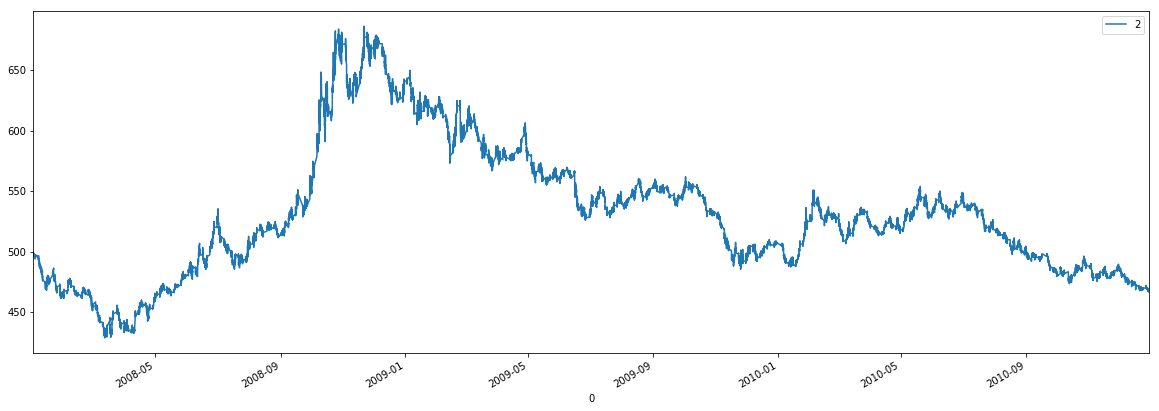

In [4]:
datos.plot(figsize=(20,7))
plt.savefig("Datos.png")

In [5]:
N  = 2    # Orden del filtro
Wn = 0.0001 # Corte de frecuancia
B, A = signal.butter(N, Wn)
trans=datos[2]

In [6]:
temp_filtrada = signal.filtfilt(B,A, trans)

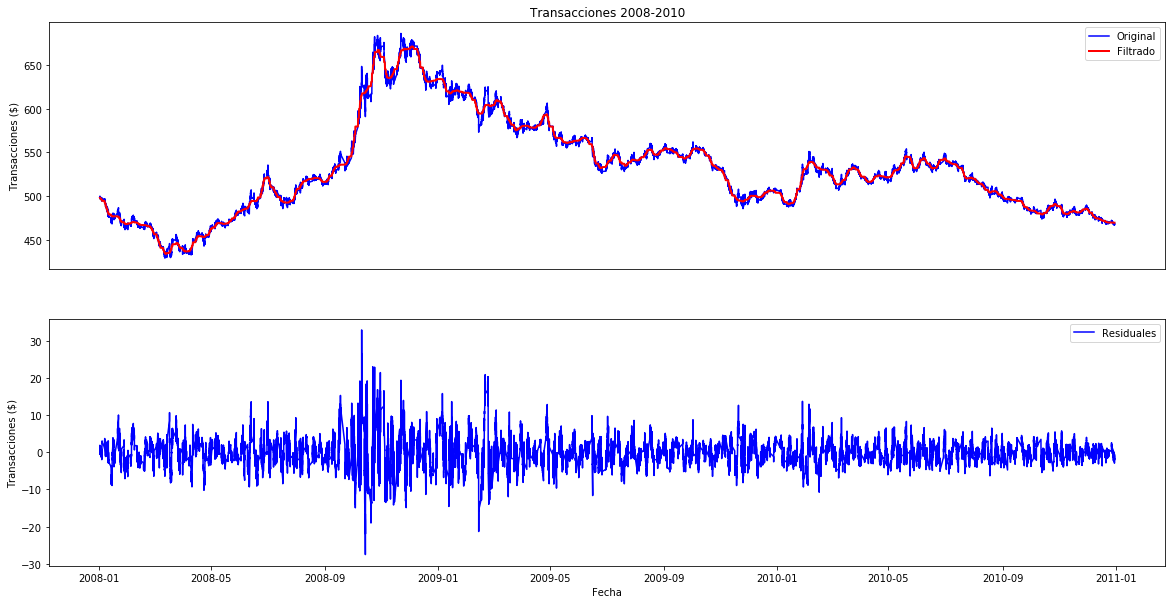

In [7]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(211)
plt.plot(fechas,trans, 'b-')
plt.plot(fechas,temp_filtrada, 'r-',linewidth=2)
plt.ylabel(r"Transacciones ($)")
plt.legend(['Original','Filtrado'])
plt.title("Transacciones 2008-2010")
ax1.axes.get_xaxis().set_visible(False)
ax1 = fig.add_subplot(212)
plt.plot(fechas,trans-temp_filtrada, 'b-')
plt.ylabel(r"Transacciones ($)")
plt.xlabel("Fecha")
plt.legend(['Residuales'])
plt.savefig("Filtro.png")

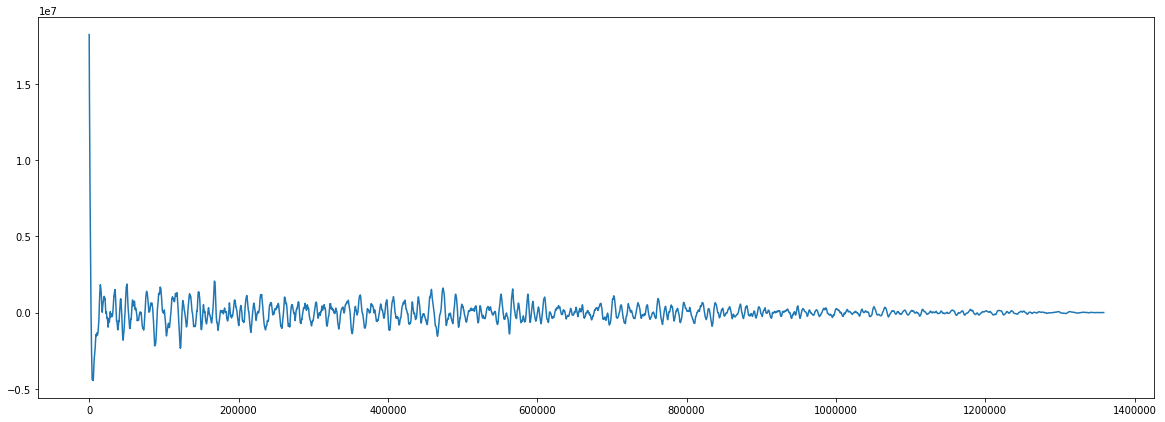

In [8]:
plt.figure(figsize=(20,7))
ruido=trans-temp_filtrada
corr=signal.correlate(ruido,ruido,mode="full")
plt.plot(corr[len(corr)//2:])
plt.savefig("Ruido.png")